# Run the whole deltas algorithm

In [27]:
%load_ext autoreload
%autoreload 2

import numpy as np
import deltas.pipeline.run as run
import deltas.model_deltas as model_deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [28]:
N1 = 10000
N2 = 10
data_clf = run.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


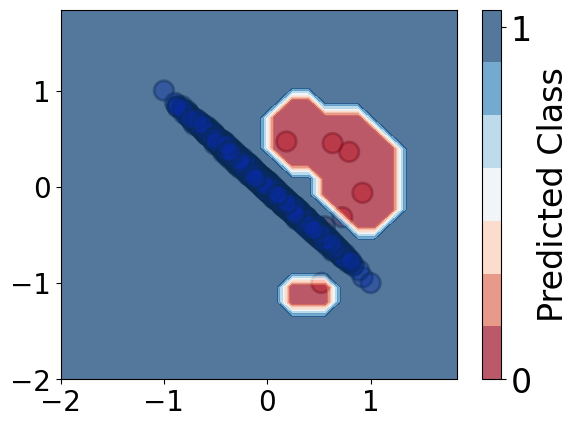

SMOTE


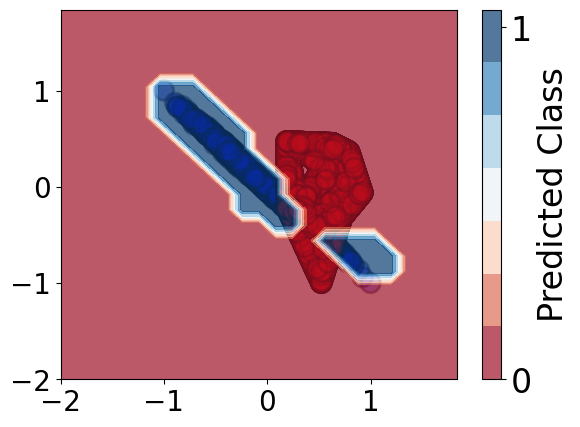

In [29]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = run.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

## Fit deltas

Original Data


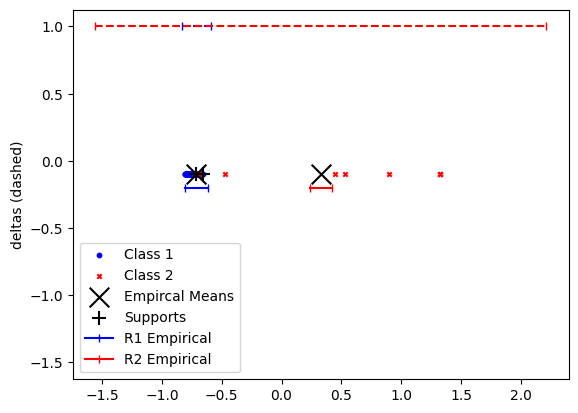

Trying random downsampling deltas:   0%|          | 16/10000 [00:00<01:03, 156.12it/s]

0.0022 0.9285918587967011


Trying random downsampling deltas:   1%|          | 63/10000 [00:01<03:55, 42.20it/s] 

0.1179 0.9999999999966966


Trying random downsampling deltas:   2%|▏         | 195/10000 [00:02<01:25, 114.25it/s]

0.1251 0.999999999999051
0.005200000000000001 0.999999999771352


Trying random downsampling deltas:   4%|▎         | 356/10000 [00:04<01:32, 104.71it/s]

0.004600000000000001 0.852160521213318


Trying random downsampling deltas:   9%|▉         | 909/10000 [00:14<02:04, 72.78it/s] 

0.0018000000000000002 0.971874634314997


Trying random downsampling deltas:   9%|▉         | 928/10000 [00:15<04:54, 30.81it/s]

0.0022 0.9065171921044587


0.0022 0.9999999954854597
Best Random Downsampled dataset solution found with budget: 10000 and 100 found viable downsampled solution
Found downsampled solution by removing 497 number of points


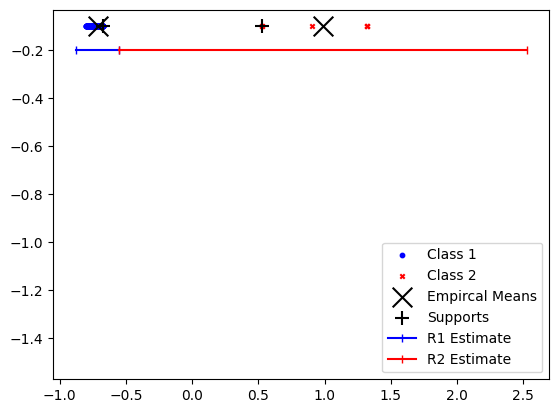

In [30]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = model_deltas.downsample_deltas(
    clf,
).fit(X, y, _print=True, _plot=True, cut_off_trials=100)

## Show parameters

In [31]:
deltas_model.print_params()

Parameters
                R:  1.3233843306167798
                N1: 9507
                N2: 6
                R1: 0.0893276214952724
                R2: 0.4582016745508214
                M:  1.203475825126803
                D:  1.7027468019360532
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.74265
SMOTE accuracy: 0.89305
deltas accuracy: 0.9288

original F1: 0.6534706793240422
SMOTE F1: 0.8915589353612168
deltas F1: 0.9233419465977605

original precision0: 0.6601967386281111
SMOTE precision0: 0.8825304136253042
deltas precision0: 0.8753501400560224

original precision1: 1.0
SMOTE precision1: 0.9041645244215938
deltas precision1: 1.0



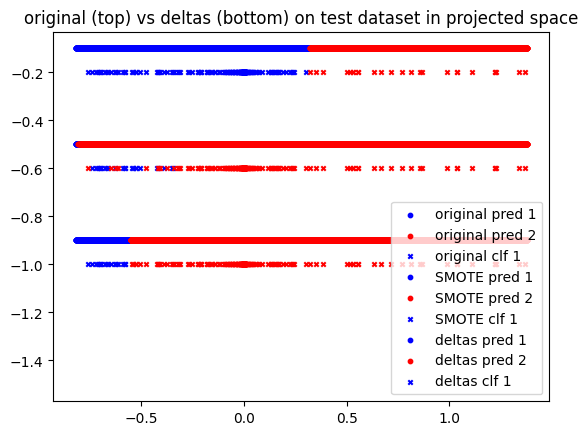

original


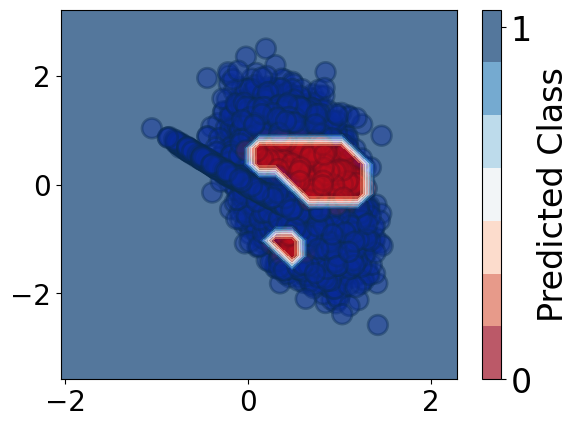

SMOTE


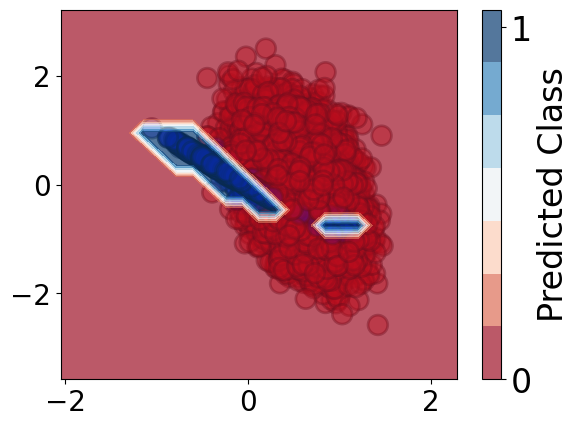

deltas


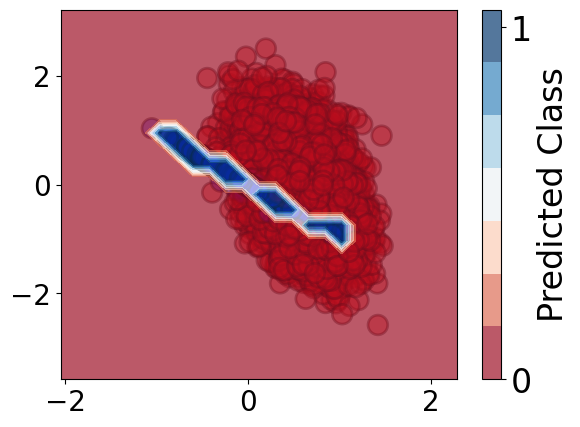

In [32]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
run.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)